08 de abril 2024

Nancy Woolrich Sorroza

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [1]:
import numpy as np
import pandas as pd

In [6]:
#Definimos las fuciones que vamos a utilizar
def f(x):
    return np.exp(x)*np.log10(x)

def g(x):
    return np.sin(x)*np.log(x)

#Definimos la función montecarlo

def montecarlo(f,a,b,N):
    u=np.random.uniform(a,b,N)
    y=f(u)
    return np.mean(y)*(b-a)

In [10]:
a=1
b=3
N=[10, 100, 1000, 10000, 100000]
tabla=pd.DataFrame(columns=["Aproximación_f", "Aproximación_g",], index=N)
for n in N: 
    tabla.loc[n,"Aproximación_f"]= montecarlo(f,a,b,n)
    tabla.loc[n,"Aproximación_g"]= montecarlo(g,a,b,n)
tabla

,Aproximación_f,Aproximación_g
10,5.119641,0.993739
100,4.75779,0.811576
1000,6.169538,0.880644
10000,6.056524,0.870727
100000,6.108917,0.870539


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def region(x,y):
    return x**2 + 2*y**2 <= - 2*x + 8*y - 7

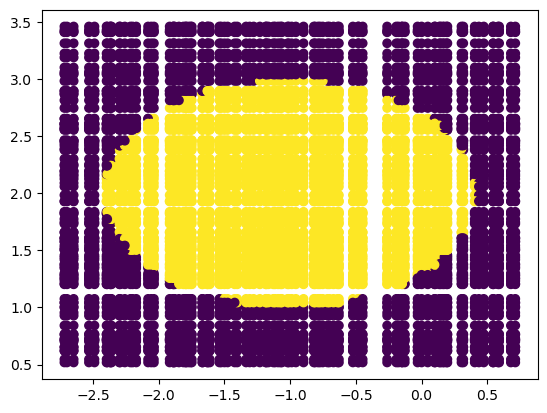

In [7]:
N=100

ax=-2.75
bx=0.75

ay=0.5
by=3.5

X=np.random.uniform(ax, bx, N)
Y=np.random.uniform(ay, by, N)
X, Y=np.meshgrid(X, Y)
plt.scatter(X, Y, c=region(X, Y))


In [8]:
def montecarlo2(region, ax, bx, ay, by, N):
    X=np.random.uniform(ax, bx, N)
    Y=np.random.uniform(ay, by, N)
    return np.mean(region(X,Y)) * ((by-ay)*(bx-ax))

In [10]:
import pandas as pd

N=[10, 100, 1000, 10000, 100000]



tabla2=pd.DataFrame(columns=["Aproximación", "Error"], index=N)
for n in N: 
    AD = montecarlo2(region, ax, bx, ay, by, n)
    AR = (bx - ax)*(by - ay)
    Crel = np.sqrt( (1 - AD/AR) / (AD/AR) )
    e_rel = np.log(Crel) - np.log(n)/2
    
    tabla2.loc[n,"Aproximación"] = AD
    tabla2.loc[n,"Error"]= e_rel
tabla2

,Aproximación,Error
10,5.25,-1.151293
100,4.62,-2.182004
1000,4.2105,-3.253228
10000,4.54125,-4.469341
100000,4.430265,-5.599035


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

1. Simulación de crecimiento de nanocristales:

Se pueden usar simulaciones de Montecarlo para modelar el crecimiento de nanocristales a partir de átomos individuales.Esto permite estudiar cómo la temperatura, la concentración de átomos y otros factores afectan el tamaño, la forma y la estructura de los nanocristales.
Estas simulaciones pueden ayudar para diseñar nanocristales con propiedades específicas para aplicaciones como la electrónica, la óptica y la catálisis.

2. Diseño de materiales nanocompuestos:

Se pueden usar para predecir las propiedades de materiales nanocompuestos, que son materiales que contienen dos o más fases a escala nanométrica.Esto permite diseñar materiales nanocompuestos con las propiedades mecánicas, térmicas, eléctricas y ópticas que se desean para un uso específico como ayudar a reducir el tiempo y el costo de desarrollo de nuevos materiales nanocompuestos.

3. Optimización de dispositivos nanotecnológicos:

Se pueden usar para optimizar el rendimiento de dispositivos nanotecnológicos como transistores, células solares y sensores. Esto permite identificar y corregir problemas de diseño antes de que se fabriquen los dispositivos; además que se mejore la eficiencia, la precisión y la vida útil de los dispositivos nanotecnológicos.